In [2]:
# load all the wsb_* files

import pandas as pd
import numpy as np

# load all the wsb_* files
stocks = ["GME", "AMC", "BB", "TSLA", "PLTR", "MSFT", "BBBY", "SPY", "AAPL"]

dfs = {}
for stock in stocks:
    df = pd.read_csv(f"wsb_{stock}.csv")
    dfs[stock] = df

dfs["GME"].head()

,Unnamed: 0,title,score,id,url,comms_num,created,body,timestamp,original_body
0,2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47.0,1.611862e+09,ceo nasdaq push halt trading investor chance r...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...
1,6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53.0,1.611862e+09,hedgefund whale spread disinfo say friday make...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...
2,7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178.0,1.611862e+09,life not fair mother tell complain arbitrary t...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...
3,10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70.0,1.611862e+09,believe right rare opportunity help good compa...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...
4,12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16.0,1.611861e+09,guy champs gme think bunch crazy retard reach ...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...


In [3]:
import re

def extract_emoji_string(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    emojis = emoji_pattern.findall(str(string))
    if emojis:
        return " ".join(emojis)
    else:
        return ""

0.21849440827908528


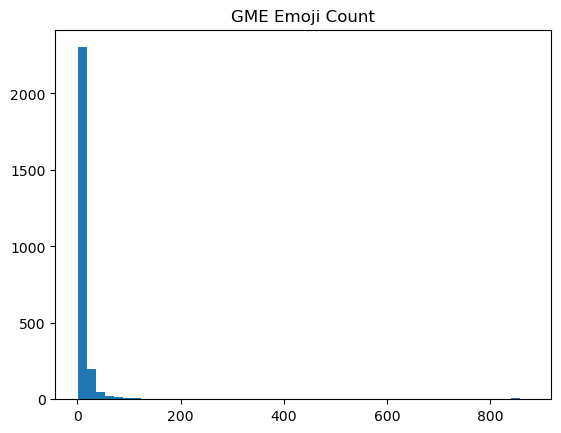

0.1944514501891551


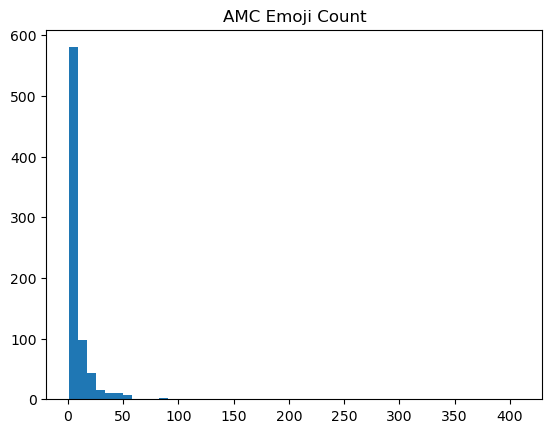

0.12950911119375233


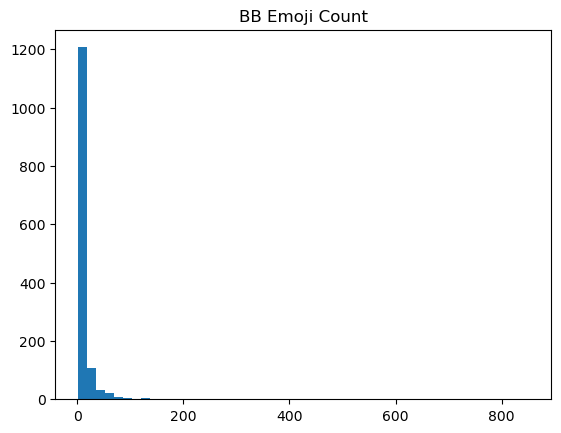

0.08793188144751923


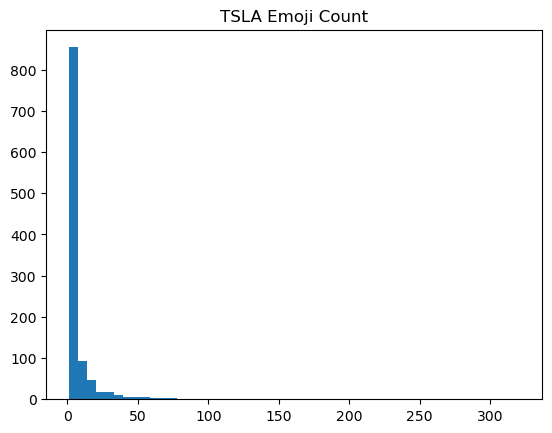

0.18158890290037832


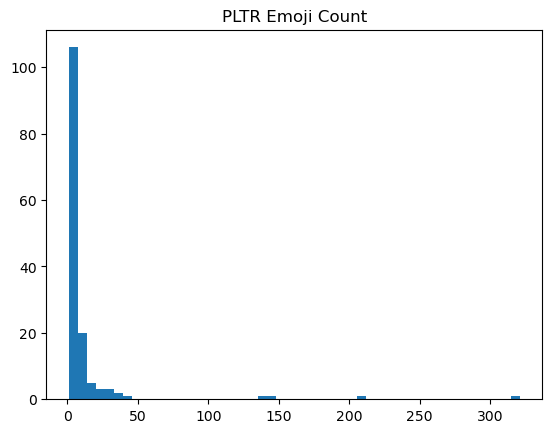

0.08914386584289496


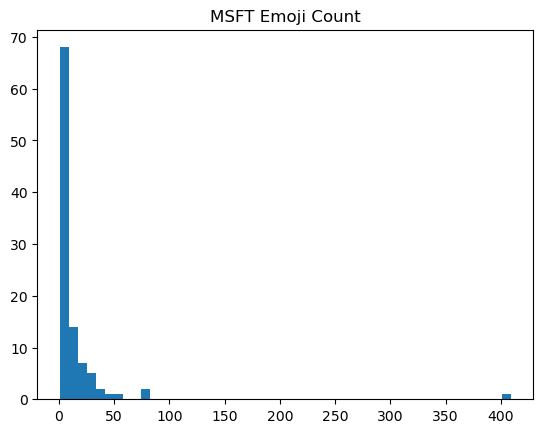

0.10970129526830558


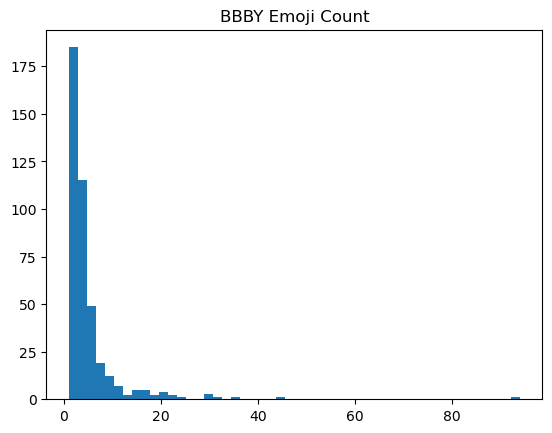

0.08001306335728282


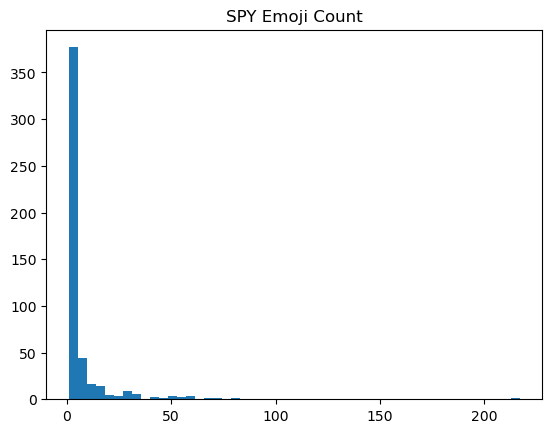

0.0912986156888596


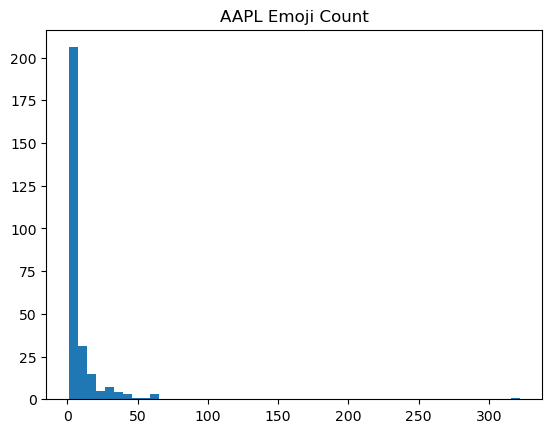

In [4]:
# get emoji counts
import matplotlib.pyplot as plt

for stock in stocks:
    df = dfs[stock]

    df["emojis"] = df["original_body"].apply(lambda x: extract_emoji_string(x))
    df["emoji_count"] = df["original_body"].apply(lambda x: len(extract_emoji_string(x)))


    # percent of posts with at least 1 emoji
    print(df[df["emoji_count"] > 0].shape[0] / df.shape[0])

    # plot histogram of number of emojis more than 0 and less than 50
    plt.hist(df[df["emoji_count"] > 0]["emoji_count"], bins=50)
    plt.title(f"{stock} Emoji Count")
    plt.show()
    




In [66]:
# print sample of posts with emojis
pd.set_option('display.max_colwidth', 50)

df = dfs["AAPL"]
df[df["emoji_count"] > 5]["original_body"].sample(10)

# print sample emojis
df[df["emoji_count"] > 5]["emojis"].sample(10)


199                                              🚀🚀🚀🚀 🚀🚀🌝
513              🦍 🚌 🐂 🎯 🐻 🎯 🐂 🎯 🐻 🎯 🐂 🎯 🐻 🎯 🐂 🎯 🐻 🎯 🌕 🖍️
89                                            🚀 🚀 🚀 🚀 🚀 🚀
142                                              🚀🚀🚀 🚀🚀🚀🚀
151                                             🚀🚀🚀🚀🚀🚀🚀🚀🚀
317                                              🚀🚀🚀🚀🚀🚀🚀🚀
298     ⭐️ ⭐️ 🤡 😭 😡 🚀 🚀 🚨 🚨 💎 🤚 💋 😂 🤔 😭 🧠 🚀 🚀 🚀 🐻 🚀 🚀 ...
671                                              🚀💥🏳️‍🌈🧸📉
2749                                       🌠 🏳️‍🌈🐻 🐻🏳️‍🌈🌠
1919                                               💪🏼💪🏼💪🏼
Name: emojis, dtype: object